# Pymaceuticals Inc.
---

### Analysis

- Objective was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
- Prepared the data by combining Mouse metadata and study results to analyse the following:
    - Summary statistics including mean, median, STD and variance of Tumor volume across different drug regimens.
    - Graphs to show the number of mouse timepoints across each drug regimens.
    - Plots to show distribution of the tumor volume for each treatment group and
    - Deep dive of mouse weight vs. tumor volume for the drug of interest, Capomulin.

### Observations

- Capomulin and Ramicane are the top 2 drug regimens to control the tumor volume over the duration of the study.
- For Capomulin, two observations were made:
    - The average tumor volume increases with the weight of the mouse.
    - Tumor volume increases for a few days first before dropping to a lower level 
 

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice.
mouse_count = pymaceuticals_data_complete["Mouse ID"].nunique ()
mouse_count

249

In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = pymaceuticals_data_complete [pymaceuticals_data_complete.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_mouse_ID = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID_alldata = pymaceuticals_data_complete.loc [pymaceuticals_data_complete['Mouse ID'].isin(duplicate_mouse_ID)]
duplicate_mouse_ID_alldata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_data_complete_clean = pymaceuticals_data_complete.loc [~pymaceuticals_data_complete['Mouse ID'].isin(duplicate_mouse_ID)]

In [80]:
# Checking the number of mice in the clean DataFrame.
mouse_count = pymaceuticals_data_complete_clean["Mouse ID"].nunique ()
mouse_count

248

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_list = pymaceuticals_data_complete_clean["Drug Regimen"].unique()
mean_tumor_volume = pymaceuticals_data_complete_clean.groupby ("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = pymaceuticals_data_complete_clean.groupby ("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = pymaceuticals_data_complete_clean.groupby ("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume = pymaceuticals_data_complete_clean.groupby ("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = pymaceuticals_data_complete_clean.groupby ("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stats_table = pd.DataFrame ({  "Mean Tumor Volume": mean_tumor_volume, 
                                       "Median Tumor Volume": median_tumor_volume, 
                                       "Tumor Volume Variance": variance_tumor_volume, 
                                       "Tumor Volume Std. Dev.": std_tumor_volume, 
                                       "Tumor Volume Std. Err.": sem_tumor_volume})
summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table_agg = pymaceuticals_data_complete_clean.groupby ("Drug Regimen")["Tumor Volume (mm3)"].agg (['mean', 'median','var','std','sem'])
summary_stats_table_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

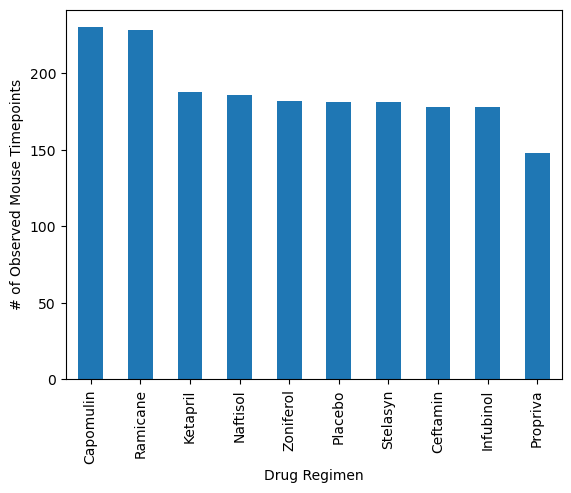

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_of_mouse_timepoints = pymaceuticals_data_complete_clean.groupby ("Drug Regimen")["Timepoint"].count().sort_values (ascending = False)
bar_plot = number_of_mouse_timepoints.plot.bar ()
bar_plot.set_ylabel ("# of Observed Mouse Timepoints")

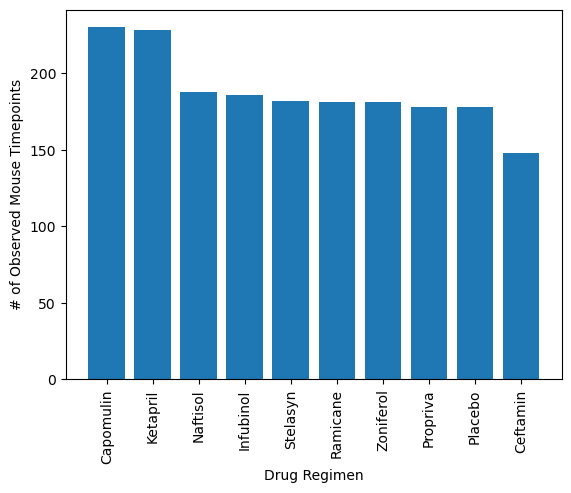

In [129]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar (drug_regimen_list, number_of_mouse_timepoints, align = "center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


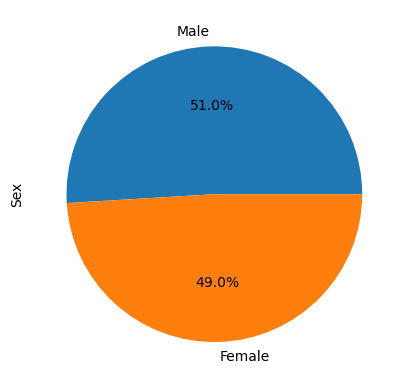

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_counts = pymaceuticals_data_complete_clean.groupby ("Sex")["Mouse ID"].count().sort_values (ascending = False)
mice_gender_counts.name = "Sex"
pie_plot = mice_gender_counts.plot.pie (y = mice_gender_counts.values, autopct='%1.1f%%')

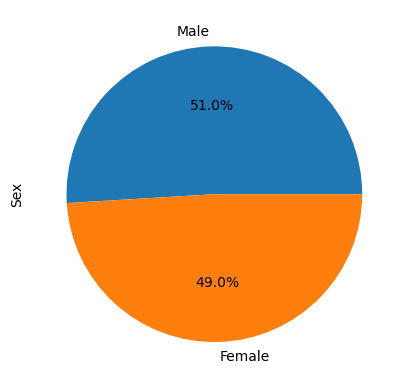

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie (mice_gender_counts.values, labels = mice_gender_counts.keys(), autopct='%1.1f%%')
plt.ylabel ("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
study_results_last_timepoint = study_results.groupby ("Mouse ID").last()
study_results_last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
pymaceuticals_data_last_timepoint = pd.merge(study_results_last_timepoint, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_data_last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [368]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol_data = pymaceuticals_data_last_timepoint.loc [pymaceuticals_data_last_timepoint['Drug Regimen'].isin(treatment_list)]

# add subset 
tumor_vol_data = tumor_vol_data.loc[:,['Drug Regimen', 'Tumor Volume (mm3)']]

# Determine outliers using upper and lower bounds
quartiles_capomulin = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Capomulin', ['Tumor Volume (mm3)']].quantile([.25,.5,.75])
tumor_vol_data_capomulin = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Capomulin',:]
lowerq_capomulin = quartiles_capomulin.loc[0.25,['Tumor Volume (mm3)']].values[0]
upperq_capomulin = quartiles_capomulin.loc[0.75,['Tumor Volume (mm3)']].values[0]
iqr_capomulin = upperq_capomulin - lowerq_capomulin

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
outliers_capomulin = tumor_vol_data_capomulin.loc[(tumor_vol_data_capomulin['Tumor Volume (mm3)'] < lower_bound_capomulin) | (tumor_vol_data_capomulin['Tumor Volume (mm3)'] > upper_bound_capomulin),'Tumor Volume (mm3)']

#Ramicane
quartiles_Ramicane = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Ramicane', ['Tumor Volume (mm3)']].quantile([.25,.5,.75])
tumor_vol_data_Ramicane = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Ramicane',:]
lowerq_Ramicane = quartiles_Ramicane.loc[0.25,['Tumor Volume (mm3)']].values[0]
upperq_Ramicane = quartiles_Ramicane.loc[0.75,['Tumor Volume (mm3)']].values[0]
iqr_Ramicane = upperq_Ramicane - lowerq_Ramicane

lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)

outliers_Ramicane = tumor_vol_data_Ramicane.loc[(tumor_vol_data_Ramicane['Tumor Volume (mm3)'] < lower_bound_Ramicane) | (tumor_vol_data_Ramicane['Tumor Volume (mm3)'] > upper_bound_Ramicane),'Tumor Volume (mm3)']

#Infubinol
quartiles_Infubinol = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Infubinol', ['Tumor Volume (mm3)']].quantile([.25,.5,.75])
tumor_vol_data_Infubinol = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Infubinol',:]
lowerq_Infubinol = quartiles_Infubinol.loc[0.25,['Tumor Volume (mm3)']].values[0]
upperq_Infubinol = quartiles_Infubinol.loc[0.75,['Tumor Volume (mm3)']].values[0]
iqr_Infubinol = upperq_Infubinol - lowerq_Infubinol

lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)

outliers_Infubinol = tumor_vol_data_Infubinol.loc[(tumor_vol_data_Infubinol['Tumor Volume (mm3)'] < lower_bound_Infubinol) | (tumor_vol_data_Infubinol['Tumor Volume (mm3)'] > upper_bound_Infubinol),'Tumor Volume (mm3)']

#Ceftamin
quartiles_Ceftamin = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Ceftamin', ['Tumor Volume (mm3)']].quantile([.25,.5,.75])
tumor_vol_data_Ceftamin = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Ceftamin',:]
lowerq_Ceftamin = quartiles_Ceftamin.loc[0.25,['Tumor Volume (mm3)']].values[0]
upperq_Ceftamin = quartiles_Ceftamin.loc[0.75,['Tumor Volume (mm3)']].values[0]
iqr_Ceftamin = upperq_Ceftamin - lowerq_Ceftamin

lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)

outliers_Ceftamin = tumor_vol_data_Ceftamin.loc[(tumor_vol_data_Ceftamin['Tumor Volume (mm3)'] < lower_bound_Ceftamin) | (tumor_vol_data_Ceftamin['Tumor Volume (mm3)'] > upper_bound_Ceftamin),'Tumor Volume (mm3)']

#Print
print (f"Capomulin's potential outliers: {outliers_capomulin}")
print (f"Ramicane's potential outliers: {outliers_Ramicane}")
print (f"Infubinol's potential outliers: {outliers_Infubinol}")
print (f"Ceftamin's potential outliers: {outliers_Ceftamin}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


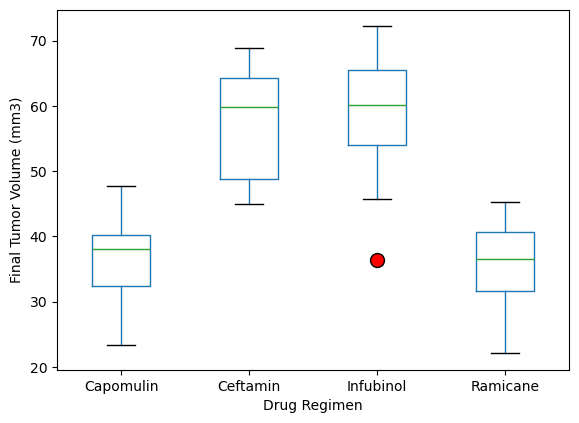

In [219]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = tumor_vol_data.boxplot ("Tumor Volume (mm3)", by = 'Drug Regimen', grid = False, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.suptitle ('')
plt.title ('')
box_plot.set_ylabel ("Final Tumor Volume (mm3)")
plt.show ()

## Line and Scatter Plots

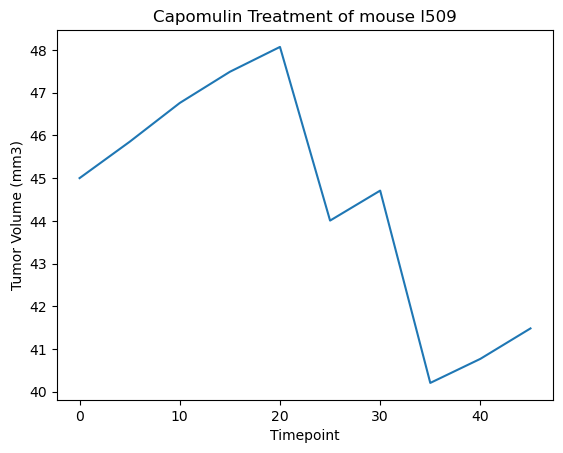

In [308]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume_vs_time_I509 = pymaceuticals_data_complete_clean.loc[(pymaceuticals_data_complete_clean['Mouse ID'] == 'l509') 
                                                          &(pymaceuticals_data_complete_clean['Drug Regimen'] == 'Capomulin'),
                                                           ['Timepoint', 'Tumor Volume (mm3)']]
line_plot = tumor_volume_vs_time_I509.plot.line (x = 'Timepoint', y = 'Tumor Volume (mm3)', legend = False)
line_plot.set_ylabel ('Timepoint (days)')
line_plot.set_ylabel ('Tumor Volume (mm3)')
line_plot.set_title ('Capomulin Treatment of mouse l509')
plt.show ()


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

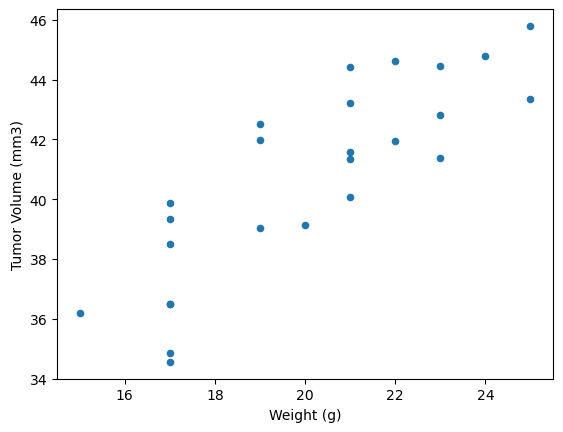

In [335]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_mouse_weight = pymaceuticals_data_complete_clean.loc[pymaceuticals_data_complete_clean['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor_volume = pymaceuticals_data_complete_clean.loc[pymaceuticals_data_complete_clean['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight_vs_tumor_volume = pd.merge (avg_mouse_weight, avg_tumor_volume, how="left", on=["Mouse ID"])
mouse_weight_vs_tumor_volume.plot.scatter (x = 'Weight (g)', y = 'Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


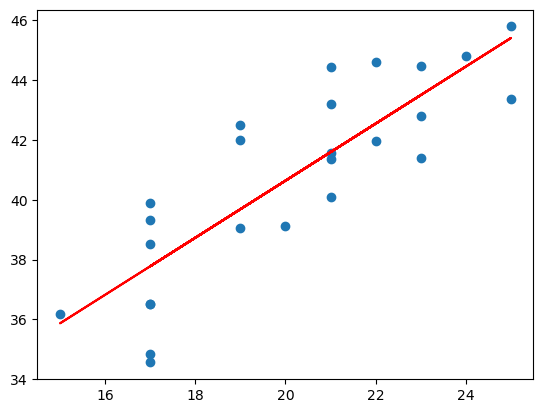

In [362]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation = st.pearsonr (avg_mouse_weight, avg_tumor_volume)
print (f"The correlation between mouse weight and the average tumor volume is {round (correlation[0], 2)}")
x_values = avg_mouse_weight.values
y_values = avg_tumor_volume.values
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter (x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()